In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

Import the necessary libaries to be used in the data analysis

In [2]:
df=pd.read_csv('diabetes.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


sample of 5 of the 768 datasets, to give us a clear overview of how data is arrranged

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


The diabetes dataset has 768 rows and 9 columns, without any missing values and occupies a memory of 54.1KB

In [4]:
df.describe() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In the descriptive statistics, examining central tendency, the average number of pregnancies is 3.85, glucose levels average 120.89, blood pressure averages 69.11 and age averages 33.24. 

The dispersion of the data, as indicated by standard deviation, varies across variables, with insulin and BMI showing higher variability. The dataset's range is depicted by minimum and maximum values, highlighting notable instances such as the maximum insulin level at 846 and the maximum BMI at 67.1. 

Quartiles reveal the distribution of data, with key percentiles such as the 25th percentile glucose level at 99, the median pregnancies at 3, and the 75th percentile age at 41. 


In [5]:
df.isnull().head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

500 not individuals are affected by Diabetes while 268 individuals are affected by Diabetes

In [8]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


1. Positive correlations 
Indicates a direct relationship between two or more variables, they are characterized by an increase in one variable coinciding with the increase of the other.

Age exhibits a positive correlation of 0.54 with the independent variable Pregnancies, suggesting that an increase in the number of pregnancies tends to correspond to advanced maternal age.

Blood pressure , skin thickness , insulin levels, BMI and the outcome of diabetes, exhibits a positive correlation with glucose levels. The coefficients for this relationship range from 0.13 to 0.47.

2. Negative Correlations:

The number of pregnancies and age have a negative correlation with skin thickness, suggesting an increase in the number of pregnancies and age as skin thickness decreases.

Diabetes Pedigree Function exhibits a negative correlation with  Pregnancies, impling that as the number of pregnancies increases, there is a decrease diabetes pedigree function.

3. Overall Observations

Older individuals tend to have a higher number of pregnancies and higher glucose levels, as evidenced by positive correlations between age  with the number of pregnancies and glucose levels.

Glucose levels and BMI, positively correlate with the diabetes, suggesting a potential likelihood of diabetes.

In [9]:
df.groupby('Outcome')['BMI'].mean()

Outcome
0    30.304200
1    35.142537
Name: BMI, dtype: float64


Those without diabetes display a mean BMI of 30.30, while, individuals with diabetes present a higher average BMI mean of  35.14. 

This analysis show that BMI is important aspect in determining outcomes for those fighting with this condition.


Text(0.5, 1.0, 'BloodPressure against Glucose Scatterplot')

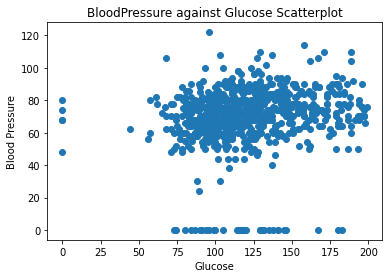

In [10]:
plt.scatter(df['Glucose'],df['BloodPressure'])
plt.xlabel('Glucose')
plt.ylabel('Blood Pressure')
plt.title('BloodPressure against Glucose Scatterplot')

The scatter plot exhibits a pronounced positive correlation between blood pressure and glucose levels, an increase in glucose levels results in increased blood pressure. 

The damaging impact of high glucose on blood vessel elasticity may account for the rise, each glucose level presents a diverse range of blood pressures values as highlighted by the plot above. 


Text(0, 0.5, 'Frequency')

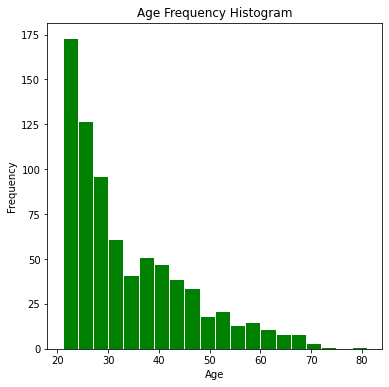

In [11]:
plt.figure(figsize=(6,6))
plt.hist(df['Age'], bins=20, color='green',edgecolor='white')
plt.xlabel('Age')
plt.title('Age Frequency Histogram')
plt.ylabel('Frequency')

The diabetes age frequency histogram reveals a dominant population aged 40 to 60, with a decline past the age of 60. 

The numbers taper towarda 80 years old suggesting representation predominantly aligns with individuals in their working or semi-retirement years. 

A rightward skewness characterizes the histogram signifying greater participation of senior individuals potentially due to heightened engagement in surveys.

Distinct peaks occur at ages 50 and 30, with a gradual decline post 60 years with a sharp decrease following after reaching 80. 

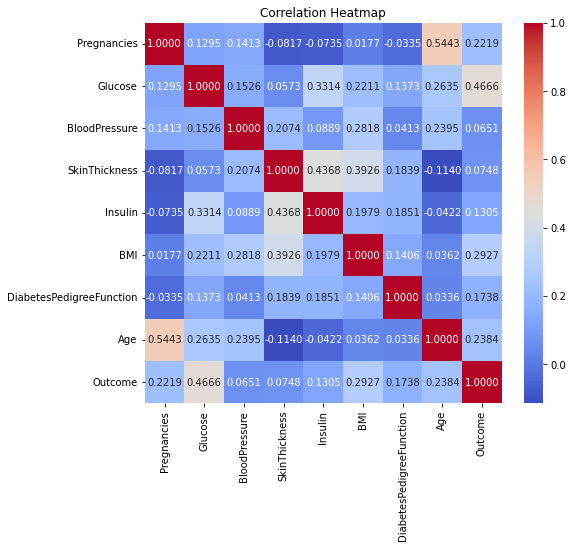

In [12]:
plt.figure(figsize=(8, 7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".4f")
plt.title('Correlation Heatmap')
plt.show()

A Heat map visualizing correlation analysis between all factors contributing to diabetes

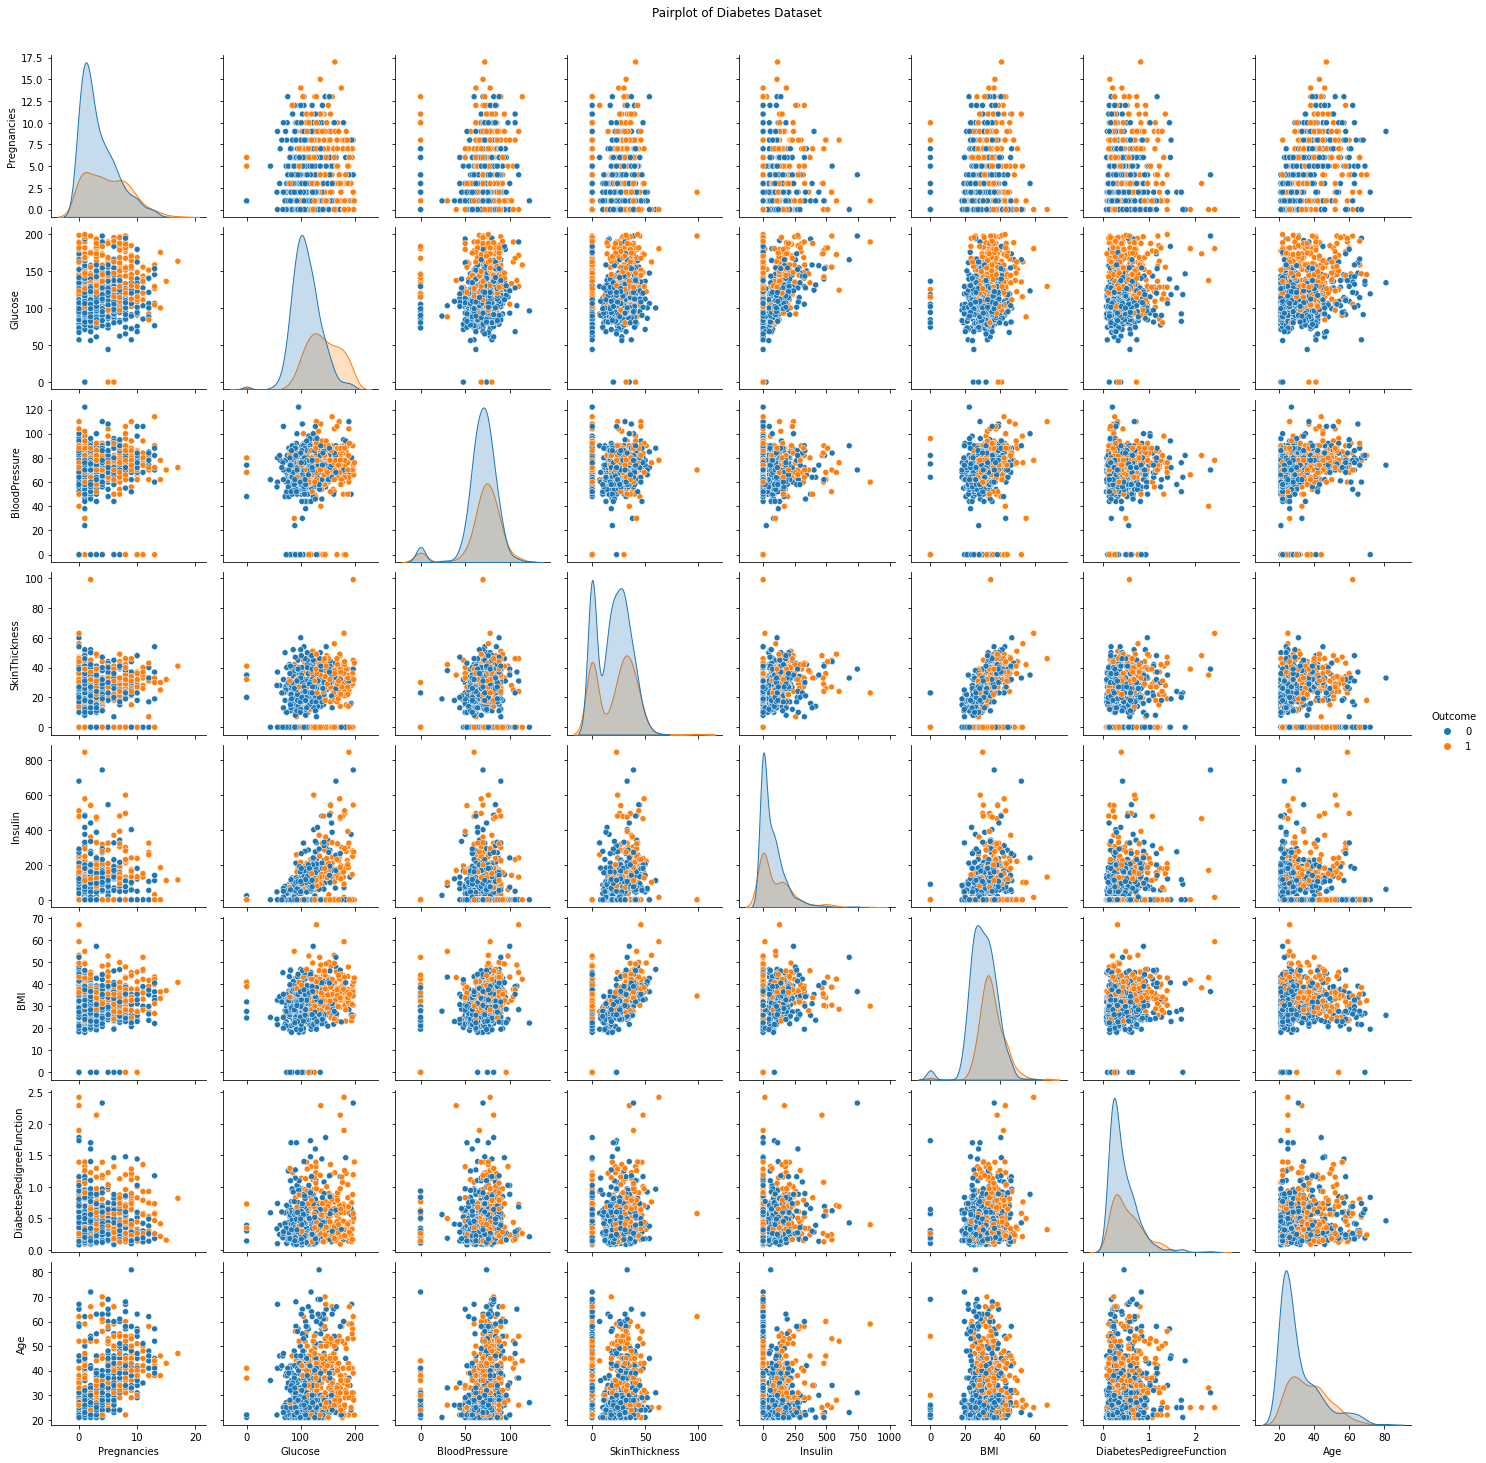

In [13]:
sns.pairplot(df, hue='Outcome', diag_kind='kde')
plt.suptitle('Pairplot of Diabetes Dataset', y=1.02)
plt.show()

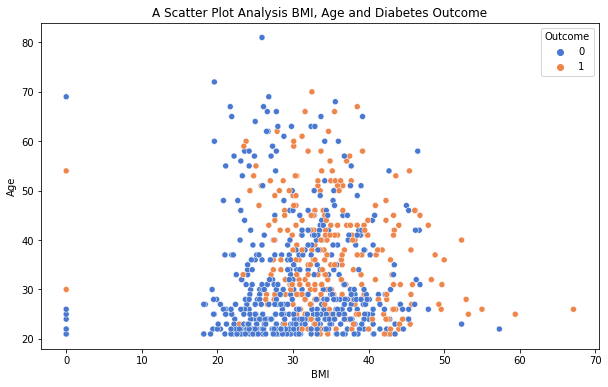

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BMI', y='Age', hue='Outcome', data=df, palette='muted')
plt.title('A Scatter Plot Analysis BMI, Age and Diabetes Outcome')
plt.xlabel('BMI')
plt.ylabel('Age')
plt.show()


The trend shows that diabetes proportion increases with an increasing BMI, especially in younger age groups, older individuals present higher diabetes proportions at lower BMI levels making a supplementary factor for the old.
